<a href="https://colab.research.google.com/github/euniceroh24/class2022spring/blob/main/nlp0613%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tokenization

In [3]:
import nltk

natural language tool kit /
artificial language와 반대되는 개념 /
natural language = text processing 


In [4]:
# copy a file from github
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/crime_punishment.txt"
os.system("curl " + url + " > crime_punishment.txt")

# read a text file in the server
file = open("crime_punishment.txt")
text = file.read().replace("\n", " ")
file.close()

text에다 string으로 가져오기. 

In [5]:
# or copy/pase text here
text = 'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. \
The ones who see things differently — they’re not fond of rules. \
You can quote them, disagree with them, glorify or vilify them, \
but the only thing you can’t do is ignore them because they change things. \
They push the human race forward, and while some may see them as the crazy ones, we see genius, \
because the ones who are crazy enough to think that they can change the world, are the ones who do.'

In [6]:
# write out a text file
file = open("tmp.txt", "w")
file.write(text)
file.close()

어떤 variable을 file로 만들기 

In [7]:
text.split()

['Here’s',
 'to',
 'the',
 'crazy',
 'ones,',
 'the',
 'misfits,',
 'the',
 'rebels,',
 'the',
 'troublemakers,',
 'the',
 'round',
 'pegs',
 'in',
 'the',
 'square',
 'holes.',
 'The',
 'ones',
 'who',
 'see',
 'things',
 'differently',
 '—',
 'they’re',
 'not',
 'fond',
 'of',
 'rules.',
 'You',
 'can',
 'quote',
 'them,',
 'disagree',
 'with',
 'them,',
 'glorify',
 'or',
 'vilify',
 'them,',
 'but',
 'the',
 'only',
 'thing',
 'you',
 'can’t',
 'do',
 'is',
 'ignore',
 'them',
 'because',
 'they',
 'change',
 'things.',
 'They',
 'push',
 'the',
 'human',
 'race',
 'forward,',
 'and',
 'while',
 'some',
 'may',
 'see',
 'them',
 'as',
 'the',
 'crazy',
 'ones,',
 'we',
 'see',
 'genius,',
 'because',
 'the',
 'ones',
 'who',
 'are',
 'crazy',
 'enough',
 'to',
 'think',
 'that',
 'they',
 'can',
 'change',
 'the',
 'world,',
 'are',
 'the',
 'ones',
 'who',
 'do.']

띄어쓰기를 기준으로 string을 list으로 쪼개기/
ones, -> 쉼표까지 하나로 처리

In [8]:
' '.join(text.split())

'Here’s to the crazy ones, the misfits, the rebels, the troublemakers, the round pegs in the square holes. The ones who see things differently — they’re not fond of rules. You can quote them, disagree with them, glorify or vilify them, but the only thing you can’t do is ignore them because they change things. They push the human race forward, and while some may see them as the crazy ones, we see genius, because the ones who are crazy enough to think that they can change the world, are the ones who do.'

' ' space를 가지고 list에 있는 토큰을 결합시켜라
'' 띄어쓰기 없이 결합됨. 

In [9]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
words = word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


nltk 안에 있는 위에 있는 text를 쪼개면, punctuation들이 따로 token으로 잡힘.
punkt이 무엇인가에 대한 정의가 필요

In [10]:
from nltk.tokenize import RegexpTokenizer
retokenize = RegexpTokenizer("[\w]+")
words = retokenize.tokenize(text)

punctuation까지 없애서 tokenize하기/
retokenize를 주로 쓸 것

### Normalization  
**Stemming** 어간 추출 대충의 패턴 규칙으로 어미를 잘라내는 것 (사전에 없는 어간 나올 수 있음)

**Lemmatization** 표제어(기본 사전형) 추출.


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
[stemmer.stem(w) for w in words]

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(w) for w in words]

존재하는 word 기반으로 표제어 추출 - wordnet사용

### Stopword

In [ ]:
from nltk.corpus import stopwords  
nltk.download('stopwords')
print(words)
words = [w for w in words if not w in stopwords.words('english')]
print(words)

조동사, 대명사, 관사 등의 단어 리스트를 받아와서, 그 리스트를 기반으로 처리/

for loop 해석) 단어가 stopword.words에 들어있지 않으면 취하라


### Collocation, Concordance

In [ ]:
nltk.download('gutenberg')
text = nltk.corpus.gutenberg.raw('austen-emma.txt')
words = retokenize.tokenize(text)

gutenberg는 저작권이 소멸된 텍스트. 무료 제공/

type(text) str/
text[0:100] 총 100개의 character가 나옴/
len(text) 약 88만개
type(words) text

In [ ]:
nltk.Text(words).collocations()  # default: (num=20, window_size=2)

총 20개의 collocation/ 두 개가 연속해서 나오는 단어들(연어) 
window_size 3 - 3개 단어가 연속해서 나오는

In [23]:
nltk.Text(words).concordance('Emma',79, 10)

Displaying 10 of 865 matches:
  Emma b
I Emma W
f Emma B
d Emma d
f Emma s
t Emma f
t Emma w
d Emma c
d Emma s
e Emma s


In [21]:
b=('ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as ')
len(b)

78

용례 찾기/ 10개 찾아라, 앞뒤로 79개

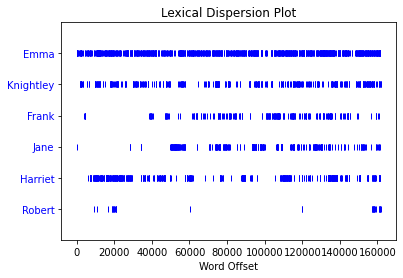

In [24]:
nltk.Text(words).dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

등장하는 부분을 파란색으로

In [25]:
# Distributional similarity: 
# find other words which appear in the same contexts as the specified word; 
# list most similar words first.
nltk.Text(words).similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


분포상으로 유사한 것은 무엇일까? 양쪽에 나오는 단어들이 EMMA와 유사한 것을 찾아라

In [26]:
# Find contexts where the specified words appear; list most frequent common contexts first.
nltk.Text(words).common_contexts(["Emma", "she"])

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


양쪽 단어들을 말하라
and와 could 사이에 EMMA와 SHE가 나타나기 쉽다

### Frequency distribution, Frequency plot

In [27]:
fd = nltk.FreqDist(words).most_common(20)
fd

[('to', 5183),
 ('the', 4844),
 ('and', 4672),
 ('of', 4279),
 ('I', 3178),
 ('a', 3004),
 ('was', 2385),
 ('her', 2381),
 ('it', 2128),
 ('in', 2118),
 ('not', 2101),
 ('be', 1970),
 ('she', 1778),
 ('that', 1730),
 ('you', 1677),
 ('had', 1606),
 ('as', 1387),
 ('he', 1365),
 ('for', 1321),
 ('have', 1301)]

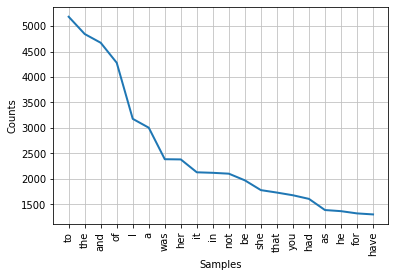

In [28]:
nltk.Text(words).plot(20)

### Dictionary

In [ ]:
nltk.download('words')
nltk.corpus.words.words('en')[-20:]
# 제일 마지막에 나오는 20개...가 아니라 19개인데 [-20:-1]하면 마지막에 나오는 하나는 빠진다

In [ ]:
len(nltk.corpus.words.words('en'))

### Extract information (pos tag, named entity)


pos part of speech 품사


#### **POS tag list**:

CC	coordinating conjunction \
CD	cardinal digit \
DT	determiner \
EX	existential there (like: "there is" ... think of it like "there exists") \
FW	foreign word \
IN	preposition/subordinating conjunction \
JJ	adjective	'big' \
JJR	adjective, comparative	'bigger' \
JJS	adjective, superlative	'biggest' \
LS	list marker	1) \
MD	modal	could, will \
NN	noun, singular 'desk' \
NNS	noun plural	'desks' \
NNP	proper noun, singular	'Harrison' \
NNPS	proper noun, plural	'Americans' \
PDT	predeterminer	'all the kids' \
POS	possessive ending	parent's \
PRP	personal pronoun	I, he, she \
PRP\$	possessive pronoun	my, his, hers \
RB	adverb	very, silently, \
RBR	adverb, comparative	better \
RBS	adverb, superlative	best \
RP	particle	give up \
TO	to	go 'to' the store. \
UH	interjection	errrrrrrrm \
VB	verb, base form	take \
VBD	verb, past tense	took \
VBG	verb, gerund/present participle	taking \
VBN	verb, past participle	taken \
VBP	verb, sing. present, non-3d	take \
VBZ	verb, 3rd person sing. present	takes \
WDT	wh-determiner	which \
WP	wh-pronoun	who, what \
WP\$	possessive wh-pronoun	whose \
WRB	wh-abverb	where, when \

In [33]:
sent = "I am Jhon from America and would like to go to Starbuck"
words = nltk.word_tokenize(sent)
words

['I',
 'am',
 'Jhon',
 'from',
 'America',
 'and',
 'would',
 'like',
 'to',
 'go',
 'to',
 'Starbuck']

In [34]:
nltk.download('averaged_perceptron_tagger')
pos = nltk.pos_tag(words)
pos

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('I', 'PRP'),
 ('am', 'VBP'),
 ('Jhon', 'RB'),
 ('from', 'IN'),
 ('America', 'NNP'),
 ('and', 'CC'),
 ('would', 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('to', 'TO'),
 ('Starbuck', 'NNP')]

In [32]:
nltk.download('maxent_ne_chunker')
NE = nltk.ne_chunk(pos)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


### Wordcloud

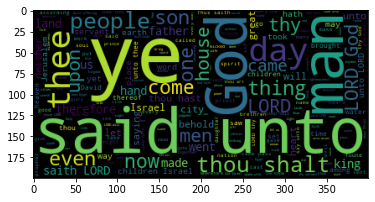

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = nltk.corpus.gutenberg.raw('bible-kjv.txt')

wc = WordCloud().generate(text) 
plt.imshow(wc)

frequency를 기반으로 frequency가 높을수록 font size도 큼
다른 package도 import 해와야함. 

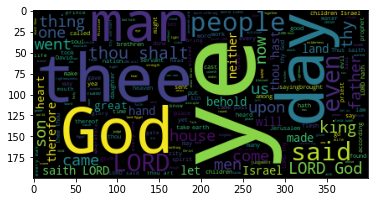

In [36]:
stopwords = set(STOPWORDS) 
stopwords.add('unto')
wc = WordCloud(stopwords = stopwords).generate(text) 
plt.imshow(wc)

stopwords 추가하는 법. 

### Regular expression

In [ ]:
import re

In [ ]:
re.search('a', 'abcdefa')

In [ ]:
re.findall('a', 'abcdefa')

In [ ]:
re.sub('a', 'b', 'abcdefa')

In [ ]:
'''       Basic Regular Expression Meta-Characters, Including Wildcards, Ranges and Closures

.	        Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[^abc]    Matches anything but a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	      Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	  Parentheses that indicate the scope of the operators
(...)     Matches whatever regular expression is inside the parentheses
\d
Matches any decimal digit; this is equivalent to the class [0-9].
\D
Matches any non-digit character; this is equivalent to the class [^0-9].
\s
Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
\S
Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
\w
Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
\W
Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].

'''

In [ ]:
engdict = nltk.corpus.words.words('en')

result = [w for w in engdict if re.search('ed$', w)]
# result = [w for w in engdict if re.search('^..j..t..$', w)]
# result = [w for w in engdict if re.search('^[ghi][mno][jlk][def]$', w)]
# result = [w for w in engdict if re.search('^[ah]+$', w)][:10]
print(result[:10])

In [ ]:
nltk.download('treebank')
wsj = nltk.corpus.treebank.words()

result = [w for w in wsj if re.search('(ed|ing)$', w)]
# result = [w for w in wsj if re.search('^[0-9]+\.[0-9]+$', w)]
# result = [w for w in wsj if re.search('^[A-Z]+\$$', w)]
# result = [w for w in wsj if re.search('^[0-9]{4}$', w)]
# result = [w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$', w)]
# result = [w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$', w)]

result = sorted(set(result))
print(result[:10])

In [ ]:
import os
url = "https://raw.githubusercontent.com/hsnam95/my/main/friends_season01_script.txt"
os.system("curl " + url + " > friends_season01_script.txt")

# read a text file in the server
file = open("friends_season01_script.txt")
text = file.read()
file.close()
text

In [ ]:
pattern = '(?<=: ).+(?=[\.|\?|\!])'
sent = re.findall(pattern, text)
sent
text = '\n'.join(sent)

In [ ]:
# write out a text file
file = open("tmp.txt", "w")
file.write(text)
file.close()